In [81]:
import os
import tarfile
import urllib

Download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
Housing_path = os.path.join("datasets","housing")
Housing_url =  Download_root + "datasets/housing/housing.tgz"


In [82]:
def fetch_data(url=Housing_url,path=Housing_path):
    os.makedirs(Housing_path,exist_ok=True)
    tgz_path = os.path.join(Housing_path,"housing.tgz")
    urllib.request.urlretrieve(Housing_url,tgz_path)
    Housing_tgz = tarfile.open(tgz_path)
    Housing_tgz.extractall(path=Housing_path)
    Housing_tgz.close()

In [83]:
fetch_data()

In [84]:
import pandas as pd
def load_data(path=Housing_path):
    csv_path = os.path.join(Housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [85]:
# housing = load_data()
housing = pd.read_csv('coastal_distance.csv')
housing = housing.drop('ind',axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry,distance_coastline
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,POINT (-122.23 37.88),0.255030
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,POINT (-122.22 37.86),0.261432
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,POINT (-122.24 37.85),0.240331
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,POINT (-122.25 37.85),0.230410
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,POINT (-122.25 37.85),0.230410


In [86]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  geometry            20640 non-null  object 
 11  distance_coastline  20640 non-null  float64
dtypes: float64(10), object(2)
memory usage: 1.9+ MB


In [87]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>],
       [<AxesSubplot:title={'center':'distance_coastline'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

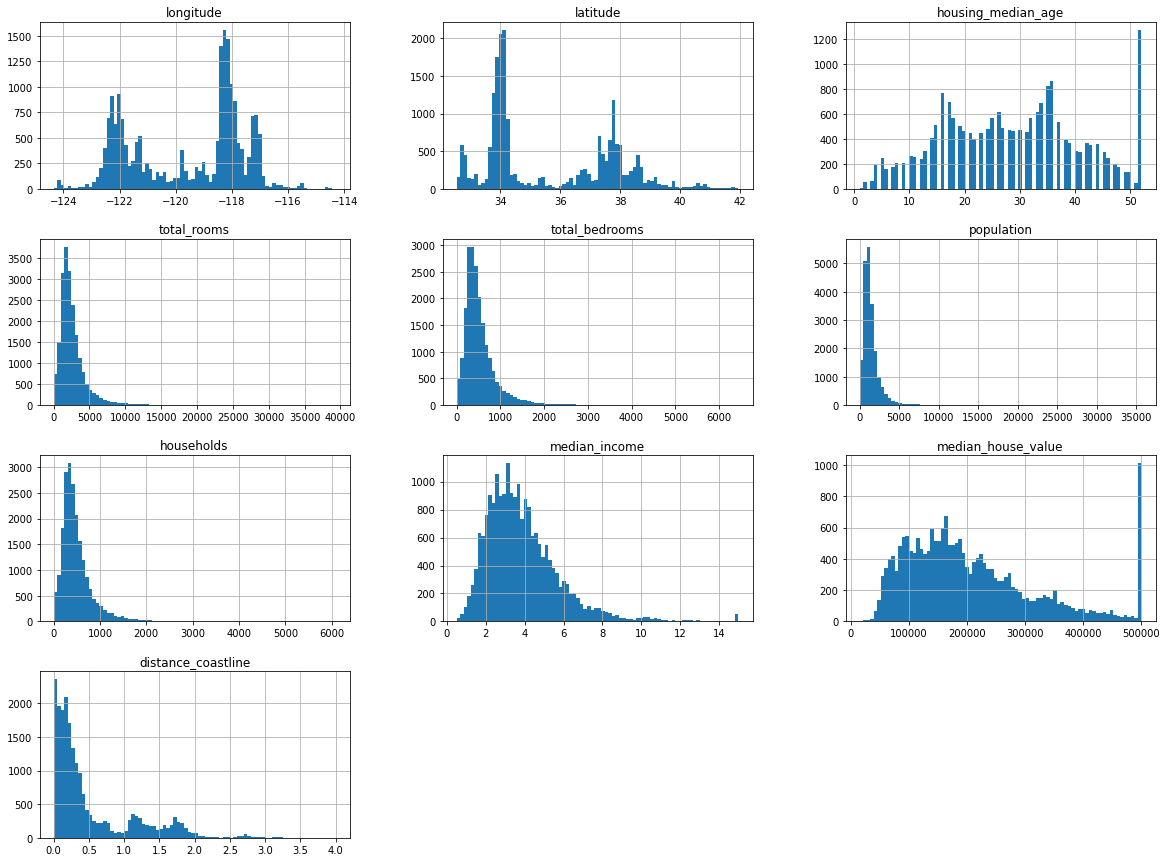

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=80,figsize=(20,15))

In [89]:
import numpy as np
def split_test_data(data=housing,ratio=0.2):
    random_perm  = np.random.permutation(len(data))
    test_set_size = int(len(data)*ratio)
    test_indices = random_perm[:test_set_size]
    train_indices = random_perm[test_set_size:]
    return data.iloc[test_indices],data.iloc[train_indices]

In [90]:
test,train = split_test_data()

In [91]:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])

In [92]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=43)
for train_idx,test_idx in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

In [93]:
strat_test_set['income_cat'].value_counts()

3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

In [66]:
for set_ in (strat_test_set,strat_train_set):
    set_.drop('income_cat',axis=1,inplace=True)

In [67]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

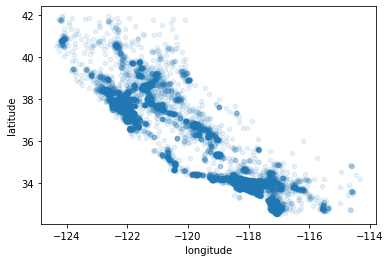

In [68]:
housing.plot(kind='scatter',x = "longitude", y='latitude',alpha=0.1)

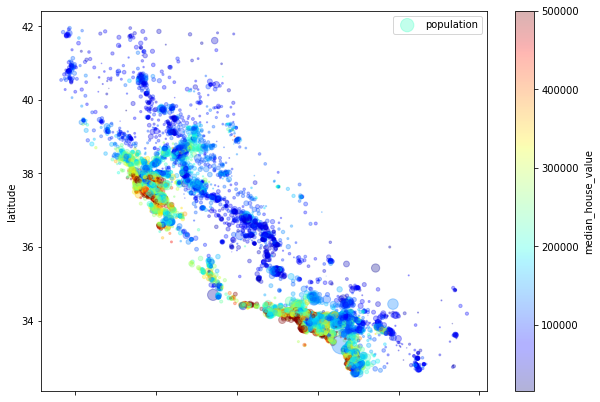

In [69]:
housing.plot(kind='scatter',x = "longitude", y='latitude',alpha=0.3,
s=housing['population']/100, label='population', figsize =(10,7),
c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [70]:
corr_matrix = housing.corr(
)


array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='distance_coastline', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='distance_coastline', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='distance_coastline'>,
        <AxesSubplot:xlabel='median_income', ylabel='distance_coastline'>,
        <AxesSubplot:xlabel='distance_coastline', ylabel='distance_coastline'>]],
      dtype=object)

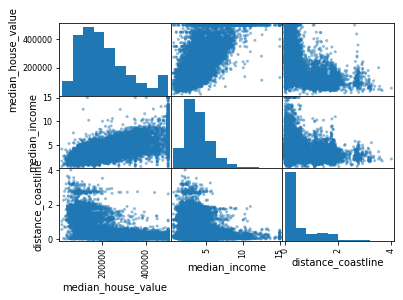

In [71]:
pd.plotting.scatter_matrix(housing[['median_house_value','median_income','distance_coastline']])

In [72]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()

In [73]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690524
rooms_per_household         0.156075
total_rooms                 0.135181
housing_median_age          0.107264
households                  0.066213
total_bedrooms              0.049873
population_per_household   -0.022856
population                 -0.024179
longitude                  -0.040286
latitude                   -0.148113
bedrooms_per_room          -0.257122
distance_coastline         -0.486558
Name: median_house_value, dtype: float64

In [74]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set.median_house_value.copy()

In [75]:
median = housing.total_bedrooms.median()
housing.total_bedrooms.fillna(median,inplace=True)

In [76]:
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()
housing_cat =housing[["ocean_proximity"]]
housing_cat_encoded = ordinal.fit_transform(housing_cat)
housing_cat.shape

(16512, 1)

In [79]:
housing['cat_encoded'] = housing_cat_encoded
# pd.plotting.scatter_matrix(housing[['cat_encoded','distance_coastline']])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,geometry,distance_coastline,cat_encoded
8049,-118.17,33.83,45.0,2019.0,363.0,880.0,339.0,4.1023,NEAR OCEAN,POINT (-118.17 33.83),0.066654,4.0
19922,-119.35,36.32,10.0,3817.0,719.0,1686.0,714.0,3.8235,INLAND,POINT (-119.35 36.32),1.751070,1.0
2827,-119.09,35.43,28.0,254.0,35.0,118.0,37.0,4.8571,INLAND,POINT (-119.09 35.43),1.119211,1.0
3905,-118.50,34.20,18.0,4249.0,933.0,2047.0,909.0,4.1304,<1H OCEAN,POINT (-118.5 34.2),0.167543,0.0
16992,-122.27,37.56,17.0,3211.0,847.0,1553.0,812.0,4.9434,NEAR BAY,POINT (-122.27 37.56),0.198015,3.0


In [78]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing)

SyntaxError: invalid syntax (2555254130.py, line 1)